In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Yelp Dataset 

In [5]:
data = pd.read_table('/Users/Jenny/Documents/Thinkful/random downloaded data/yelp_labelled.txt', header=None)
data.columns = ['Message', 'Feedback']

In [9]:
data.head(10)

,Message,Feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [10]:
data['Feedback'].value_counts()

1    500
0    500
Name: Feedback, dtype: int64

In [11]:
# Messages with positive feedback 
data[data['Feedback'] == 1].head(20)

,Message,Feedback
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken,with cran...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


In [13]:
#looking at positive keywords:
keywords = ['great', 'amazing', 'prompt', 'awesome', 'beautiful', 'delicious', 'wow', 'favorite', 'love', 'enjoy']

#create the feature
for key in keywords:
    data[str(key)] = data.Message.str.contains(str(key), case = False)

In [14]:
#change back to boolean
data['Feedback'] = data['Feedback'].map({1: True, 0: False})

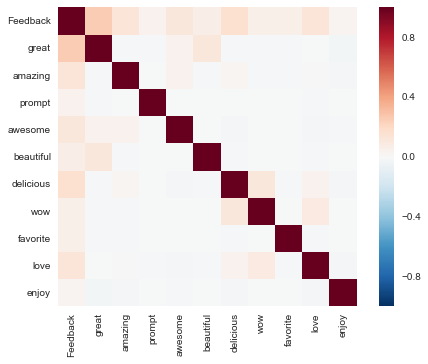

In [17]:
#look at correlations
sns.heatmap(data.corr(), center=0, square=True)
plt.show()

In [19]:
# training data set
data_training = data[keywords]
output_training = data['Feedback']

#using Bernouilli model since data is boolean
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

#fit model:
bnb.fit(data_training, output_training)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_training)

print("Number of mislabeled points out of a total {} points : {}".format(
    data_training.shape[0],
    (output_training != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 357


In [20]:
#just going to create a defn. for ease of use

def feedback_model(data, keywords):

    for key in keywords:
        data[str(key)] = data.Message.str.contains(str(key), case=False)
       
    #back to boolean
    data['Feedback'] = data['Feedback'].map({1: True, 0: False})
    
    #correlations?
    sns.heatmap(data.corr(), center=0, square=True)
    plt.show()
    
    #training data:
    data_training = data[keywords]
    output_training = data['Feedback']

    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()

    #fit:
    bnb.fit(data_training, output_training)

    #Classify
    y_pred = bnb.predict(data_training)

    print("Number of mislabeled points out of a total {} points : {}".format(
    data_training.shape[0], (output_training != y_pred).sum()))

## IMDb Dataset 

In [27]:
data_imdb = pd.read_table('/Users/Jenny/Documents/Thinkful/random downloaded data/imdb_labelled.txt', header=None)
data_imdb.columns = ['Message', 'Feedback']

In [24]:
data_imdb.tail(20)

,0,1
728,Judith Light is one of my favorite actresses a...,1
729,I keep watching it over and over.,1
730,"It's a sad movie, but very good.",1
731,"If you have not seen this movie, I definitely ...",1
732,"She is as lovely as usual, this cutie!",1
733,Still it's quite interesting and entertaining ...,1
734,;) Recommend with confidence!,1
735,This movie is well-balanced with comedy and dr...,1
736,It was a riot to see Hugo Weaving play a sex-o...,1
737,":) Anyway, the plot flowed smoothly and the ma...",1


In [25]:
keywords_imdb = ['best', 'cool', 'perfect', 'entertaining', 'classic', 'good', 'great', 'amazing']

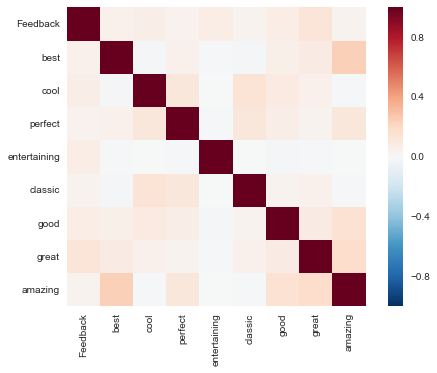

Number of mislabeled points out of a total 748 points : 323


In [28]:
feedback_model(data_imdb, keywords_imdb)